In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as mvn

%matplotlib inline

In [4]:


data_train = np.load('kmnist-train-imgs.npz', allow_pickle=True)
lst = data_train.files

#for item in lst:
#    print(item)
#    print(data_train[item])

In [5]:


data_test = np.load('kmnist-test-imgs.npz', allow_pickle=True)
lst = data_test.files

#for item in lst:
#    print(item)
#    print(data_test[item])

In [6]:


data_test_label = np.load('kmnist-test-labels.npz', allow_pickle=True)
lst = data_test_label.files

#for item in lst:
#    print(item)
#    print(data_test_label[item])

In [7]:


data_train_labels = np.load('kmnist-train-labels.npz', allow_pickle=True)
lst = data_train_labels.files

#for item in lst:
#    print(item)
#    print(data_train_labels[item])

In [8]:
train_data = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_data = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [9]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [10]:
print(train_data[:,-1].shape)
X = train_data[:, -1]
X

(60000, 28)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0]], dtype=uint8)

In [11]:
print(train_labels.shape)
y = train_labels
y

(60000,)


array([8, 7, 0, ..., 0, 4, 9], dtype=uint8)

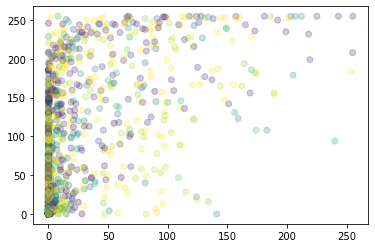

In [12]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.25)

In [ ]:
# need to get some more visualazitions working 
# how to get that teaser working 


In [13]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis = 0), "cov":X_k.var(axis = 0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self, X):
        N,D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
        

In [14]:
gnb = GaussNB()
gnb.fit(X,y)

In [15]:
y_hat = gnb.predict(X)

In [16]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)


In [17]:
print(f"Accuracy : {accuracy(y, y_hat):0.3f}")

Accuracy : 0.200


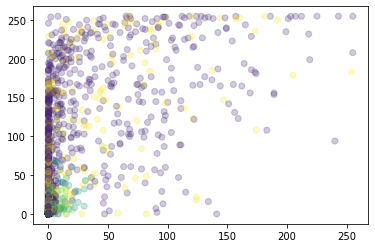

In [18]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [23]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis = 0)
            self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov":
                                  (1/(N_k - 1)) * np.matmul((X_k - mu_k).T, X_k - mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
    

In [24]:
X2 = X
y2 = y

In [25]:
gb = GaussBayes()

In [26]:
gb.fit(X2, y2)
y2_hat = gb.predict(X2)

In [27]:
print(f"Accuracy : {accuracy(y, y2_hat):0.3f}")

Accuracy : 0.224


In [37]:
class BernNB():
    def fit(self, X, y, epsilon = 1e-10):
        N, D = X.shape
        self.likelihoods = {}
        self.priors = {}
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y==k, :]
            p = (sum(X_k) + 1) / (len(X_k) + 2)
            self.likelihoods[k] = {'mean':p, 'cov': p * (1 - p) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        
        for k,l in self.likelihoods.items():
            # Using the Bernouli function/formula. Trick is to get the matrices/vectors to go from mxn to a 1x1 number for each k value.
            P_hat[:, k] = np.log(self.priors[k]) + np.matmul(X , np.log(l['mean'])) + np.matmul((1 - X ), np.log(abs(1 - l['mean'])) )
            
            
        
        

In [33]:
X3 = X
y3 = y

In [38]:
bnb = BernNB()
bnb.fit(X3, y3) # Use the X and Y Training set here 


In [52]:
X_test = test_data[: , -1]
y_test = test_labels

In [53]:
y3_hat = bnb.predict(X_test)


In [54]:
print(accuracy(y_test, y3_hat))

0.0


In [56]:
# what? #X[np.Where]

In [39]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [42]:
X.shape

(60000, 28)

In [40]:
X_test = test_data[: , -1]
y_test = test_labels

In [41]:
X_test.shape

(10000, 28)

In [48]:
X_test = test_data[1:, :]
X_test.shape

(9999, 28, 28)

In [49]:
X_test = test_data[:,:-1]
X_test.shape

(10000, 27, 28)

In [50]:
X_test = test_data[:,-1]
X_test.shape

(10000, 28)

In [51]:
flatten = X_test.flatten()
flatten.shape

(280000,)

In [ ]:
#X2 = X2[1:,:]  # removing the first row of X
#y2 = X2[:,-1]  # labels = last column of X
#X2 = X2[:,:-1]  #

In [ ]:
print(accuracy(y_test, y_hat))


X[np.Where]

In [57]:
class GaussBayes():
    def fit(self, X , y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        likehoods
        
        mean(axis=0)
        lihoods[k] = {"mean":X_k.mean(axis=0), "cov": 
                     (1/(N_k-1))*np.matmul((X_k-mu_k)+epsilon )}
        
        self.priors[k]= len(X_K)/len(X)
        
    def predict(self, X):
        N , D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.items():
                P_hat[:, k ] = mvn.logpdf( X, l["mean"], l["cov"]) + np.log(self.priors[k])
        
        return P_hat.argmax(axis=1)

In [58]:
X4 = X
y4 = y

In [59]:
GB = GaussBayes()
GB.fit(X3, y3) # Use the X and Y Training set here 

NameError: name 'likehoods' is not defined

In [60]:
class GenBayes():
    
    def fit(self,X,y, DistStr, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        
        self.K = set(y.astype(int))
        
        if DistStr=="Gauss":
            
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                mu_k=X_k.mean(axis=0)
                self.likelihoods[k]={"mean":X_k.mean(axis=0),
                                     "cov":(1/(N_k-1))*
                                     np.matmul((X_k-mu_k).T,X_k-mu_k)+
                                     epsilon*np.identity(D)}
                self.priors[k] = len(X_k)/len(X)
                
        if DistStr =="Multinomial":
            
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                mu_k = X_k.mean(axis=0)
                self.likelihoods[k]={"N":N, "P":sum(N_k/len(X))}
                self.priors[k] = len(X_k)/len(X)
                
        if DistStr == "Bernoulli":
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                
                self.likelihoods[k] = {"P":N_k/len(X)}
                self.priors[k] = len(X_k)/len(X)
    
    def predict(self, x, DistStr):
        
        N, D = X.shape
        
        if DistStr =="Gauss":
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.items():
                P_hat[:,k] = MVN.log(self.priors[k])
                +np.log(self.priors[k])
            return P_hat.argmax(axis=1)
        if DistStr == "Multinomial":
            P_hat = np.zeros((N, len(self.k)))
            
            for k, l in self.likelihoods.items():
                P_hat[:, k] = mlvn.logpdf(X, l["N"], l["P"])
                +np.log(self.priors[k])
                
            return P_hat.argmax(axis=1)
        
        if DistStr == "Bernoulli":
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.item():
                P_hat[:, k] = bernoulli.logpdf(X, l["P"]) + np.log(self.priors[k])
            return P_hat.argmax(axis = 1)
        
        
    
        
    

In [61]:
X5 = X
y5 = y

In [64]:
GenB_G = GenBayes()
GenB_G.fit(X5, y5, DistStr='Gauss')

In [68]:
yG_hat = GenB_G.predict(X_test, DistStr='Gauss')

NameError: name 'MVN' is not defined

In [65]:
GenB_M = GenBayes()
GenB_M.fit(X5, y5, DistStr='Multinomial')

NameError: name 'N' is not defined

In [66]:
GenB_B = GenBayes()
GenB_B.fit(X5, y5, DistStr='Bernoulli')

In [69]:
yB_hat = GenB_G.predict(X_test, DistStr='Bernoulli')

AttributeError: 'dict' object has no attribute 'item'